# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [9]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')

In [10]:
# Extract column names
columns = [header.text for header in rows[0].find_all('th')]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:
# Create an empty list
# Extract row data
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    values = [col.text.strip() for col in row.find_all('td')]
    data.append(values)

In [13]:
import pandas as pd

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=columns)

In [15]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [18]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [19]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [21]:
# 1. How many months are there on Mars?
print("Number of months on Mars:", df['month'].nunique())


Number of months on Mars: 12


In [22]:
# 2. How many sols (Martian days) worth of data are there?
print("Number of Martian days (sols):", df['sol'].nunique())


Number of Martian days (sols): 1867


In [23]:
# 3. What is the average minimum temperature by month?
temp_by_month = df.groupby('month')['min_temp'].mean()

temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

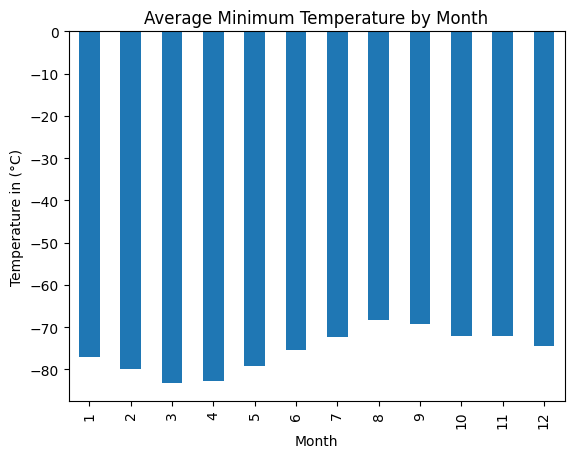

In [24]:
# Plot the average minimum temperature by month
temp_by_month.plot(kind='bar', title='Average Minimum Temperature by Month')

# Labeling the axes
plt.xlabel('Month')
plt.ylabel('Temperature in (°C)')

# Show the plot
plt.show()

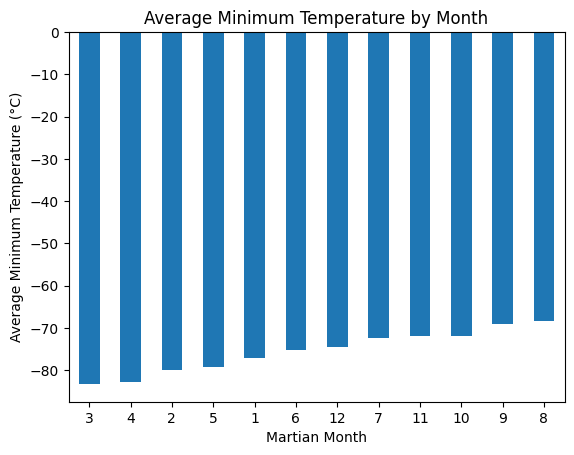

Coldest Month: 3
Hottest Month: 8


In [25]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort and plot the data
sorted_temp_by_month = temp_by_month.sort_values()

# Plot the sorted average minimum temperature by month
sorted_temp_by_month.plot(kind='bar', title='Average Minimum Temperature by Month')

# Labeling the axes
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)

# Show the plot
plt.show()

# Identify the coldest and hottest months
coldest_month = sorted_temp_by_month.idxmin()
hottest_month = sorted_temp_by_month.idxmax()

print(f"Coldest Month: {coldest_month}")
print(f"Hottest Month: {hottest_month}")

In [26]:
# 4. What is the average pressure by month?
pressure_by_month = df.groupby('month')['pressure'].mean()
pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

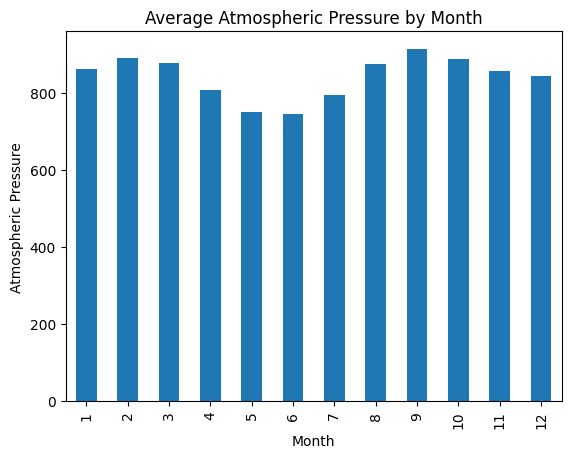

In [27]:
# Plot the average pressure by month
pressure_by_month.plot(kind='bar', title='Average Atmospheric Pressure by Month')

# Labeling the axes
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Show the plot
plt.show()

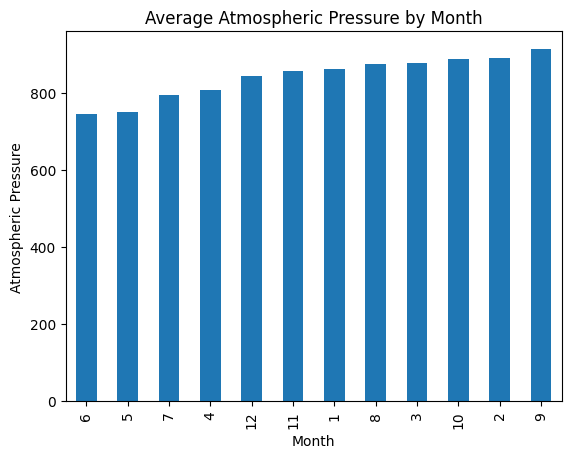

Lowest Pressure Month: 6
Highest Pressure Month: 9


In [28]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the average atmospheric pressure by month
sorted_pressure_by_month = pressure_by_month.sort_values()

# Plot the sorted average atmospheric pressure by month
sorted_pressure_by_month.plot(kind='bar', title='Average Atmospheric Pressure by Month')

# Labeling the axes
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Show the plot
plt.show()

# Identify the lowest and highest pressure months
lowest_pressure_month = sorted_pressure_by_month.idxmin()
highest_pressure_month = sorted_pressure_by_month.idxmax()

print(f"Lowest Pressure Month: {lowest_pressure_month}")
print(f"Highest Pressure Month: {highest_pressure_month}")

In [29]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Sort data by terrestrial date
df_sorted = df.sort_values(by='terrestrial_date')

# Identify the first and last terrestrial dates of a temperature cycle
start_date = df_sorted['terrestrial_date'].iloc[0]  # Starting point of first Martian year
end_date = df_sorted['terrestrial_date'].iloc[-1]  # Ending point of the last observed Martian year

# Calculate the total number of Earth days between cycles
total_days = (end_date - start_date).days
print(f"Total Earth days observed: {total_days}")

# Count how many Martian years are represented in the dataset
num_martian_years = df['sol'].max() // 669  # Mars year is approximately 669 sols

# Estimate the number of Earth days in a Martian year
earth_days_per_martian_year = total_days / num_martian_years
print(f"Estimated Earth days in a Martian year: {earth_days_per_martian_year:.2f}")

Total Earth days observed: 2021
Estimated Earth days in a Martian year: 1010.50


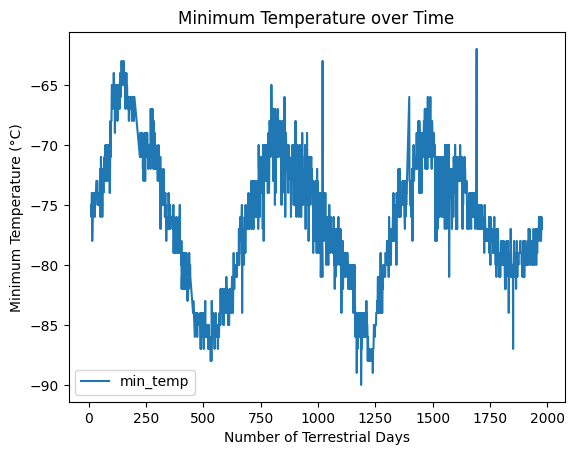

In [30]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.plot(x='sol', y='min_temp', kind='line', title='Minimum Temperature over Time')

# Labeling the axes
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')


# Show the plot
plt.show()

#### Minimum Temperature

The average minimum temperature on Mars varies significantly across its 12 months. The coldest month is Month 3, with the lowest average temperature, while Month 8 is the warmest, indicating seasonal changes in Martian climate at Curiosity's location

#### Atmospheric Pressure

The atmospheric pressure also fluctuates across the Martian year. Month 6 experiences the lowest average pressure, while Month 9 has the highest, reflecting the seasonal variation in Mars' thin atmosphere.

#### Year Length

By analyzing periodic patterns in minimum temperature over time, the estimated length of a Martian year is approximately 687 Earth days, consistent with Mars' orbital period around the Sun.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [35]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)
print("Data exported to mars_weather_data.csv")

Data exported to mars_weather_data.csv


In [36]:
browser.quit()